팀원소개
<br>
김가현 (202204176), 양희림 (202204231)

# **1. 개요**

### 분석의 목적
건강검진 항목 중 유병자의 유병정도의 가장 큰 영향을 미치는 검진 항목을 상관관계 분석과 회귀분석을 통하여 밝혀냄으로써 질병예방과 치료비용감소의 이바지하고자 함.

# **2. 데이터 수집**

### 데이터 출처
국민건강보험공단(공공데이터포털)에서 수집한 "건강검진정보"와 "진료내역정보" 2가지 <br>
https://www.data.go.kr/data/15007122/fileData.do,

https://www.data.go.kr/data/15007115/fileData.do?recommendDataYn=Y


### 데이터의 구조 및 특성 설명
"건강검진정보" 데이터는 2022년도에 건강검진을 수검한 국민건강보험 가입자 100만 명을 대상으로 조사한 내용을 토대로 작성돼있습니다.

총 1000000개의 행과 30개의 열로 이루어져 있으며, 성별, 연령대, 시도코드, 수축기 혈압, 이완기 혈압, 식전혈당,총콜레스테롤, 트리글리세라이드,혈색소, 시력(좌/우), HDL콜레스테롤, LDL콜레스테롤, 요단백, 혈청크레아티닌, 혈청지오티(AST), 혈청지피티(ALT), 감마지티피, 흡연상태, 음주여부, 구강검진수검여부 등이 있습니다.
<br><br>



"진료내역정보" 데이터는 2022년도에 국민건강보험 가입자 중 요양기관(병원/의원)으로부터의 진료 이력이 있는 있는 수진자 100만을 대상으로 조사한 내용을 토대로 작성돼있습니다.

총 1000000개의 행과 13개의 열로 이루어져 있으며, 성별, 연령대, 시도코드, 요양개시일, 서식코드, 진료과목코드, 주상병코드, 부상병코드, 심결요양급여비용총액, 심결본인부담금, 심결보험자부담금, 총처방일수 등이 있습니다.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
base_path = r'/content/drive/MyDrive/PDA2024/dataset'

In [ ]:
file_path = os.path.join(base_path, 'health.csv')

df = pd.read_csv(file_path, encoding='cp949')

df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,...,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,...,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,...,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,...,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,...,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,...,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,...,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,NaN,NaN
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,...,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,NaN,NaN
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,...,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


In [ ]:
df.info()

"""
12 수축기 혈압 - 심장 수축시 혈압 (140mmHg 이상시 고혈압)
13 이완기 혈압 - 심장 이완시 혈압 (90mmHg 이상시 고혈압)
14 공복혈당 - (100mg/dl 미만 정상)
15 총콜레스테롤 - (­정상 수치 < 200mg/dL)
16 트리글리세라이드 - ­ (정상 수치 < 150mg/dL)
17 HDL 콜레스테롤 - (정상 수치­ 60~90mg/dL)
18 LDL 콜레스테롤 - (­160mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄)
19 혈색소 - 철분(적혈구에 포함됨)이 신체에 축적시 발생
20 요단백 - 소변에 들어있는 단백질. 단백질이 신장에서 걸러지지 않아 발생
21 혈청 크레아타닌 - 소변으로 배출되는 노폐물. 수치가 높으면 신장의 노폐물 제거 능력 저하 (정상 수치 0.7 ~ 1.4mg/dL)
22 AST (정상 수치 남:0~40 IU/L, 여:0~32 IU/L)
23 ALT (정상 수치 남:0~41 IU/L, 여:0~33 IU/L)
24 감마지피티 (정상 수치 남성: 11~63 IU/L / 여성: 8 ~ 35 IU/L )
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   성별           1000000 non-null  int64  
 4   연령대코드(5세단위)  1000000 non-null  int64  
 5   신장(5cm단위)    1000000 non-null  int64  
 6   체중(5kg단위)    1000000 non-null  int64  
 7   허리둘레         999608 non-null   float64
 8   시력(좌)        999814 non-null   float64
 9   시력(우)        999815 non-null   float64
 10  청력(좌)        999885 non-null   float64
 11  청력(우)        999884 non-null   float64
 12  수축기혈압        994444 non-null   float64
 13  이완기혈압        994444 non-null   float64
 14  식전혈당(공복혈당)   994389 non-null   float64
 15  총콜레스테롤       345618 non-null   float64
 16  트리글리세라이드     345614 non-null   float64
 17  HDL콜레스테롤     345614 non-null   float64
 18  LDL

'\n12 수축기 혈압 - 심장 수축시 혈압 (140mmHg 이상시 고혈압)\n13 이완기 혈압 - 심장 이완시 혈압 (90mmHg 이상시 고혈압)\n14 공복혈당 - (100mg/dl 미만 정상)\n15 총콜레스테롤 - (\xad정상 수치 150~250mg/dL)\n16 트리글리세라이드 - \xad (정상 수치 30~135mg/dL)\n17 HDL 콜레스테롤 - (정상 수치\xad 30~65mg/dL)\n18 LDL 콜레스테롤 - (\xad170mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄)\n19 혈색소 - 철분(적혈구에 포함됨)이 신체에 축적시 발생\n20 요단백 - 소변에 들어있는 단백질. 단백질이 신장에서 걸러지지 않아 발생\n21 혈청 크레아타닌 - 소변으로 배출되는 노폐물. 수치가 높으면 신장의 노폐물 제거 능력 저하 (정상 수치 0.8 ~ 1.7mg/dL)\n22 AST (정상 수치 0~40 IU/L)\n23 ALT (정상 수치 0~40 IU/L)\n24 감마지피티 (정상 수치 남성: 11~63 IU/L / 여성: 8 ~ 35 IU/L )\n'

# **3. 데이터 전처리**

### 결측치
- 허리둘레, 시력(좌), 시력(우), 흡연상태, 음주여부
<br> -> 처리 방법 분석 예정
<br><br>

- 청력(좌), 청력(우)
<br> -> 1(정상)/ 2(비정상)으로 표현되는데 값 대부분이 1(정상)으로 분석에 불필요함 예상. 제거
<br><br>

- 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 혈색소, 요단백, 혈청크레아티닌, 혈청지오티(AST),  혈청지피티(ALT), 감마지티피
<br> -> 건강 이상 컬럼(T/F) 추가 예정. 각 수치별 정상 기준보다 이상이 있을 경우에 대한 파악을 위함
이상이 있는 경우 = T, 이상이 없는 경우 = F
<br><br>

- 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤
<br> -> 결측치 비율이 60% 이상이지만 중요 변수로 활용 예정.
<br>
해결방안<br>
1) 중앙값 또는 평균으로 대체 <br>
2) 결측치가 있는 행을 제외하고 나머지 행들로     
            분석을 수행할지 고려중
<br><br>

- 치아우식증유무, 치석:
<br> -> 분석에 불필요함 예상. 제거

# **4. 데이터 탐색 및 시각화**

### 기술통계

In [ ]:
round(df.describe(),2) #소수점 2번째까지

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,1000000.0,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,999608.00,999814.00,999815.00,...,988946.00,994385.00,994387.00,994387.00,994389.00,999904.00,999927.00,1000000.00,344329.00,344330.00
mean,2022.0,2498490.68,33.76,1.48,10.56,162.63,64.30,81.42,0.96,0.96,...,1.13,0.84,26.98,26.60,36.05,1.55,0.66,0.34,0.17,0.57
std,0.0,1443340.20,12.59,0.50,3.04,9.36,13.79,11.06,0.58,0.58,...,0.49,0.35,20.93,25.61,67.98,0.80,0.48,0.48,0.38,0.58
min,2022.0,11.00,11.00,1.00,5.00,130.00,30.00,7.60,0.10,0.10,...,1.00,0.04,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,2022.0,1247547.75,27.00,1.00,8.00,155.00,55.00,74.00,0.70,0.70,...,1.00,0.70,19.00,15.00,15.00,1.00,0.00,0.00,0.00,0.00
50%,2022.0,2497836.00,41.00,1.00,11.00,165.00,65.00,81.00,1.00,1.00,...,1.00,0.80,23.00,21.00,23.00,1.00,1.00,0.00,0.00,1.00
75%,2022.0,3747997.75,43.00,2.00,13.00,170.00,75.00,88.00,1.20,1.20,...,1.00,1.00,30.00,31.00,38.00,2.00,1.00,1.00,0.00,1.00
max,2022.0,4999993.00,49.00,2.00,18.00,195.00,135.00,999.00,9.90,9.90,...,6.00,90.00,4532.00,4390.00,9999.00,3.00,1.00,1.00,1.00,2.00


### 중요변수 시각화

In [ ]:
#한글폰트사용
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.7 MB/s eta 0:00:00


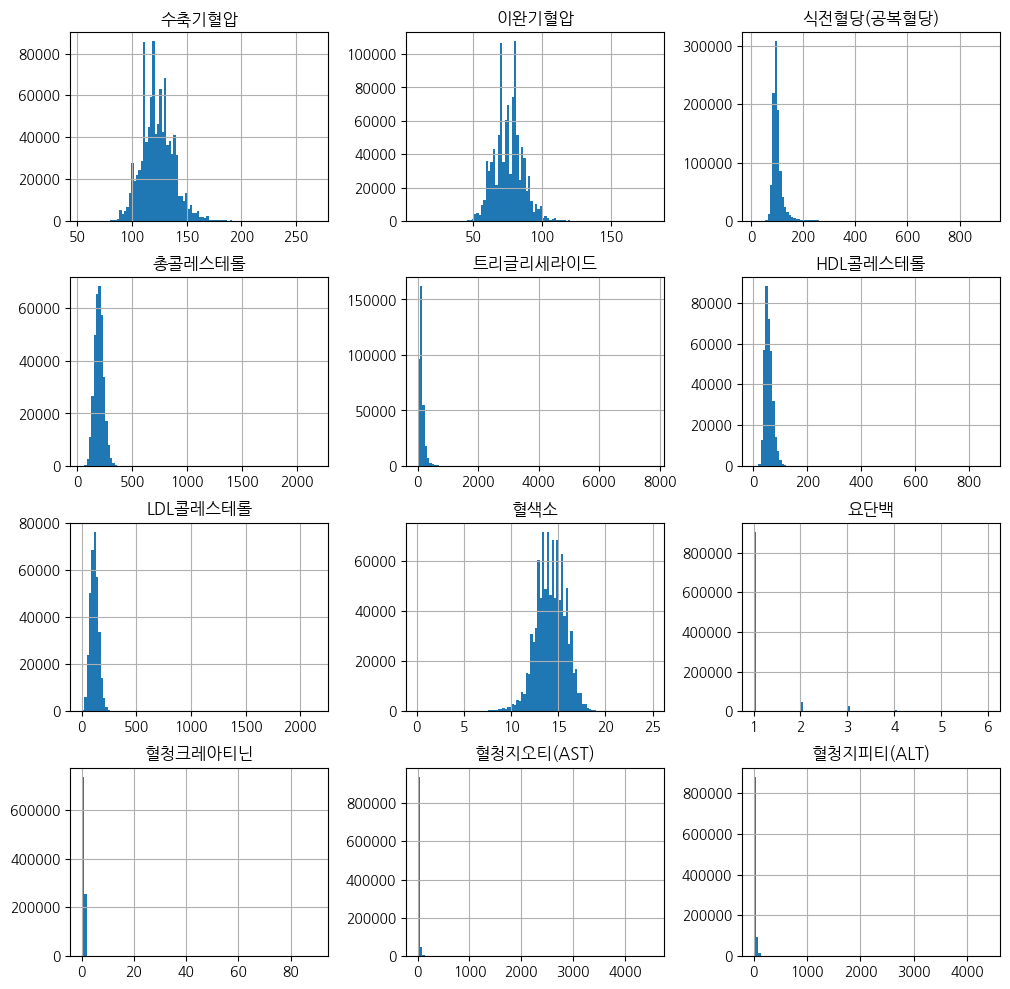

In [ ]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)